<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/class_simpleNN_mobilePrice_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 23rd June, 2024
# Mobile Price dataset
# Experiments with NN


In [1]:
# 1.0
import pandas as pd
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# 1.1
import tensorflow as tf

# 1.2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
# 2.0 Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
# 2.1 Read Bank Customers churn data

path = "/gdrive/MyDrive/deeplearning/"


In [5]:
# 2.2
data = pd.read_csv(path + "mobile_price.csv")

In [6]:
# 2.2.1
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
# 2.2.2
data.shape   # (2000,21)

(2000, 21)

In [8]:
# 2.3 Pop out target
y = data.pop('price_range')

In [9]:
# 2.3.1
data.shape   # (2000,20)

(2000, 20)

In [10]:
# 3.0 Check NULL
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [11]:
# Split into train/test data
X_train,X_test, y_train,y_test = train_test_split(data,
                                                  y,
                                                  test_size = 0.25)

In [12]:
# Split data shapes:
X_train.shape
X_test.shape

(1500, 20)

(500, 20)

In [13]:
# Scale data to same scale:
# Instatiate classes:

mm = MinMaxScaler()
mm.fit(X_train)

MinMaxScaler()

In [14]:
# Transform data:

X_train = mm.transform(X_train)
X_test = mm.transform(X_test)

## Model

1. Input layer  --10 neurons  
2. Hidden layer-- 90 neurons, activation: sigmoid
3. Hidden layer-- 500 neurons activation: relu
4. Hidden layer-- 50 neurons activaton: relu
5. Output layer --1 neuron sigmoid



In [26]:
# 6.0
model = tf.keras.Sequential()

In [27]:
# 6.1
model.add( tf.keras.layers.Input(shape = (20,) ))

In [28]:
# 6.2 Start
model.add(tf.keras.layers.Dense(40, activation = 'relu'))  # MAke it 5 and then 20 (not more or less)

In [29]:
# 6.2.1 Experiment with adding a dropout layer
#       but then increase number of units in Dense layer from 20 to 40
model.add(tf.keras.layers.Dropout(rate = 0.5 ))

In [30]:
model.add(tf.keras.layers.Dense(20, activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate = 0.5 ))

In [31]:
model.add(tf.keras.layers.Dense(10, activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate = 0.5 ))

In [32]:
# 6.3 Experiment first with activation of sigmoid
#     and then no activation function
model.add(tf.keras.layers.Dense(4,
                                activation = 'softmax'
                                ))    # Keep sigmoid; then remove sigmoid

In [33]:
# 6.4 Model summary:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 40)                840       
                                                                 
 dropout_3 (Dropout)         (None, 40)                0         
                                                                 
 dense_5 (Dense)             (None, 20)                820       
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 4)                

In [35]:
# 6.5 Compile model
#     Expt with adam
model.compile(
                 loss =  tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer = 'adam',  # Try first with default optimizer and then with 'adam'
                                      #  may not make much difference
                 metrics = ['acc']
              )

In [41]:
# 7.0
#
history = model.fit(X_train,y_train,
                    epochs = 70,
                    validation_data = (X_test, y_test)
                   )

Epoch 1/70
47/47 [==============================] - 0s 5ms/step - loss: 0.6174 - acc: 0.7227 - val_loss: 0.4035 - val_acc: 0.8600
Epoch 2/70
47/47 [==============================] - 0s 3ms/step - loss: 0.6254 - acc: 0.7227 - val_loss: 0.3851 - val_acc: 0.8780
Epoch 3/70
47/47 [==============================] - 0s 3ms/step - loss: 0.6127 - acc: 0.7273 - val_loss: 0.3759 - val_acc: 0.8820
Epoch 4/70
47/47 [==============================] - 0s 3ms/step - loss: 0.6120 - acc: 0.7307 - val_loss: 0.3898 - val_acc: 0.8800
Epoch 5/70
47/47 [==============================] - 0s 4ms/step - loss: 0.6015 - acc: 0.7420 - val_loss: 0.3791 - val_acc: 0.8820
Epoch 6/70
47/47 [==============================] - 0s 4ms/step - loss: 0.5895 - acc: 0.7360 - val_loss: 0.3753 - val_acc: 0.8760
Epoch 7/70
47/47 [==============================] - 0s 4ms/step - loss: 0.5932 - acc: 0.7413 - val_loss: 0.3685 - val_acc: 0.8840
Epoch 8/70
47/47 [==============================] - 0s 4ms/step - loss: 0.5854 - acc: 0.74

In [42]:
# 7.1
model.evaluate(X_test,y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.2694 - acc: 0.9080


[0.269385427236557, 0.9079999923706055]

In [43]:
type(history.history)

dict

In [44]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

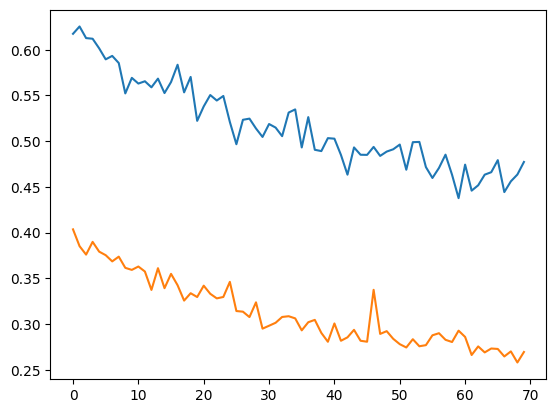

In [45]:
# Plot without dropouts
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)

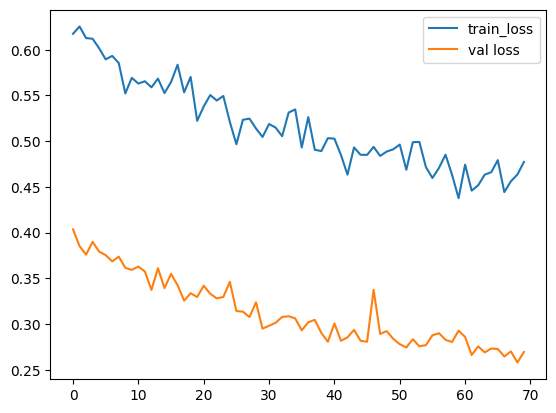

In [46]:
# plot with dropouts
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label = "train_loss")
plt.plot(val_loss, label = "val loss")
plt.legend()

In [ ]:
######################### I am done #################